In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

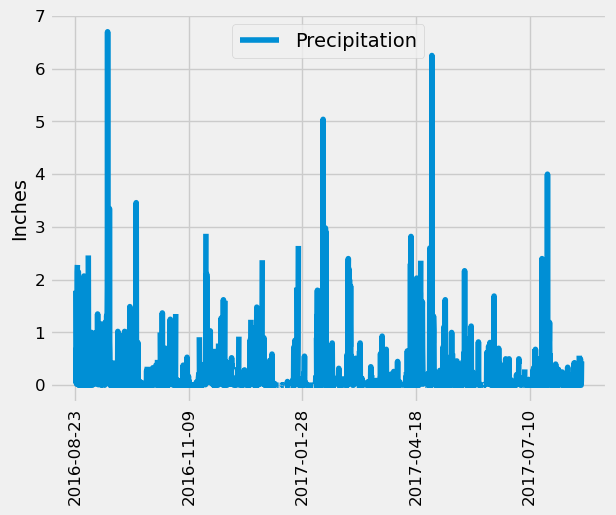

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_datetime = dt.datetime.strptime(most_recent_date,"%Y-%m-%d").date()
# Calculate the date one year from the last date in data set.
query_date = most_recent_datetime - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_prcp_df = pd.DataFrame(last_year_prcp, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
sorted_prcp_df = last_year_prcp_df.sort_values(by = "Date")

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_df.plot(kind='line',x='Date', xlabel='',ylabel='Inches',legend=True, fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).group_by(Measurement.station).count()
station_count


9

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
descending_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

for station, count in descending_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = descending_stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Observed Temperature, August 2016- August 2017')

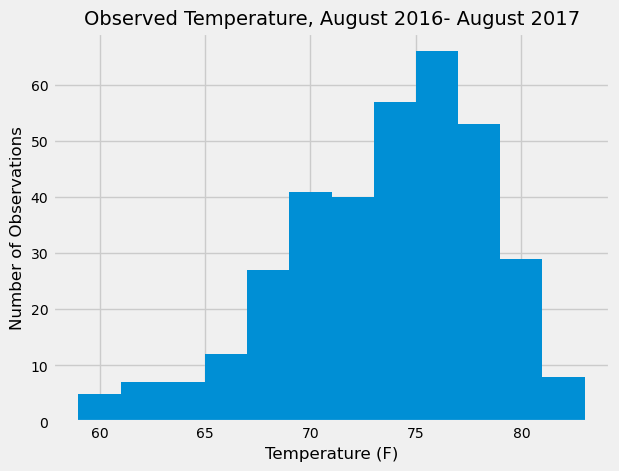

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_recent = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= query_date)
station_recent_df = pd.DataFrame(station_recent, columns = ["Temperature", "Date"])
# Plot as histogram
ax = station_recent_df.plot.hist(bins = 12, legend = False)
# Format table
ax.tick_params(axis='both', labelsize=10)
ax.set_xlabel("Temperature (F)", fontsize = 12)
ax.set_ylabel("Number of Observations", fontsize = 12)
ax.set_title("Observed Temperature, August 2016- August 2017", fontsize = 14)

# Close Session

In [29]:
# Close Session
session.close()